In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import imblearn

In [2]:
data = pd.read_csv('Data/spotify_dataframe', index_col = 'Unnamed: 0')
data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,popularity_labels
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes'],Successful
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[],Successful
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[],Successful
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[],Successful
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[],Successful


In [3]:
#look at counts of our target value to see how imbalanced the data is 

data['popularity_labels'].value_counts()

Unsuccessful       16691
Successful          8087
Very Successful     7761
Name: popularity_labels, dtype: int64

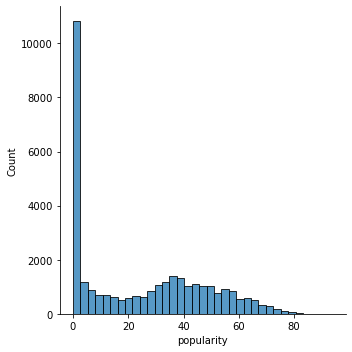

In [4]:
#further investigating the imbalance 
sns.displot(data['popularity'])

In [5]:
## maybe add reference lines to the hist to show pop buckets?

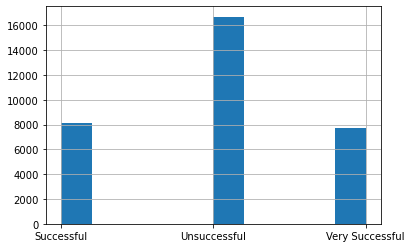

In [6]:
data.popularity_labels.hist()

Curious to see what some scatterplots look like. Is there any separation or pattern? 

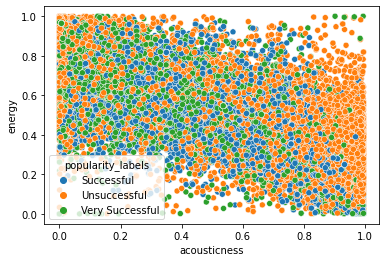

In [7]:
sns.scatterplot(data = data, x = 'acousticness', y = 'energy', hue = 'popularity_labels')

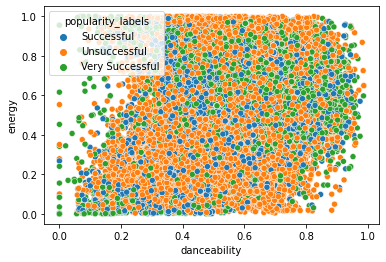

In [8]:
sns.scatterplot(data = data, x = 'danceability', y = 'energy', hue = 'popularity_labels')

All right, well these look insane. But it's good to see how integrated these classes are

### Creating an artificially balanced dataset 

#### Synthetic Minority Oversampling Technique (SMOTE)

In [9]:
#prepare data before applying imblearn

drop = ['popularity', 'popularity_labels', 'genres', 'artists']

X = data.drop(columns = drop, axis = 1)
y = data['popularity_labels']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

#ss = StandardScaler()

#scaled_X = ss.fit_transform(X)

In [10]:
#create synthetic minority samples! 

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

X_bal,y_bal = sm.fit_sample(X, y.ravel())

In [11]:
#check before and after value counts 
print('After SMOTE: \n {}'.format(np.array(np.unique(y_bal, return_counts=True)).T))
print('')
print('Before SMOTE: \n {}'.format(np.array(np.unique(y, return_counts=True)).T))

After SMOTE: 
 [['Successful' 16691]
 ['Unsuccessful' 16691]
 ['Very Successful' 16691]]

Before SMOTE: 
 [['Successful' 8087]
 ['Unsuccessful' 16691]
 ['Very Successful' 7761]]


In [12]:
X_bal

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,count
0,0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,5,1,10
1,0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,5,1,26
2,0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,0,1,7
3,0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,0,1,27
4,0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50068,0.288309,0.749524,206436.423569,0.731012,0.022177,0.113992,-4.119457,0.080220,147.448896,0.689010,10,1,4
50069,0.517380,0.590202,309983.476707,0.348788,0.419358,0.227686,-12.379110,0.105198,85.052283,0.510273,5,1,2
50070,0.140722,0.702657,241311.858533,0.347328,0.000020,0.190373,-7.437678,0.050452,86.515469,0.379266,1,1,2
50071,0.563661,0.555996,310922.179488,0.364635,0.000007,0.141180,-12.168791,0.094075,116.197772,0.465051,0,0,7


Great. This seemed to work!

#### NearMiss

In [13]:
#remove samples to create balance 

from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

X_nm, y_nm = nr.fit_sample(X, y.ravel())

In [14]:
#check before and after value counts 
print('After NearMiss: \n {}'.format(np.array(np.unique(y_nm, return_counts=True)).T))
print('')
print('Before NearMiss: \n {}'.format(np.array(np.unique(y, return_counts=True)).T))

After NearMiss: 
 [['Successful' 7761]
 ['Unsuccessful' 7761]
 ['Very Successful' 7761]]

Before NearMiss: 
 [['Successful' 8087]
 ['Unsuccessful' 16691]
 ['Very Successful' 7761]]


In [22]:
#create .csv files for new datasets for use in a modeling notebook

data_dropped = data.drop(columns = drop, index = 1)

smote_data = pd.DataFrame(X_bal)
smote_data['popularity_labels'] = y_bal
smote_data.to_csv('Data/smote_data')

nm_data = pd.DataFrame(X_nm)
nm_data['popularity_labels'] = y_nm
nm_data.to_csv('Data/nearmiss_data')

In [24]:
nm_data

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,count,popularity_labels
0,0.677000,0.5830,165133.00,0.19800,0.000000,0.232000,-10.88800,0.062200,105.01000,0.50900,0,1,2,Successful
1,0.003890,0.4670,191413.00,0.70300,0.000025,0.251000,-7.63400,0.065500,138.92600,0.64700,0,1,2,Successful
2,0.064700,0.6460,240600.00,0.78400,0.000014,0.460000,-4.84300,0.030900,122.27300,0.54700,9,1,2,Successful
3,0.303100,0.5870,222535.25,0.85575,0.006074,0.145275,-8.83325,0.108175,118.96075,0.52425,0,1,8,Successful
4,0.171084,0.4485,195166.50,0.77850,0.000193,0.237000,-5.53900,0.039900,102.75350,0.60200,6,1,4,Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23278,0.473500,0.5535,263286.50,0.60900,0.000392,0.229000,-9.36100,0.035300,98.84750,0.53550,7,1,2,Very Successful
23279,0.028100,0.5590,209636.00,0.87300,0.000000,0.185000,-4.40100,0.054300,150.05500,0.79700,0,0,2,Very Successful
23280,0.686000,0.5200,286840.00,0.28500,0.000000,0.093100,-10.75400,0.027000,93.92200,0.07980,10,1,2,Very Successful
23281,0.006550,0.6030,206180.00,0.96400,0.000003,0.143000,-2.88600,0.048700,135.02800,0.79600,8,0,2,Very Successful


In [25]:
data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,popularity_labels
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes'],Successful
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[],Successful
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[],Successful
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[],Successful
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[],Successful
